In [0]:

import platform
if platform.system() == "Darwin": 
  import os
  os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
datagen = ImageDataGenerator(
    featurewise_center=False,
    rotation_range=45,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zca_whitening=True,
    zoom_range=0.4,
    horizontal_flip=True,
    validation_split=0.2)
x_train = x_train / 255
x_test = x_test / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train_train = x_train[0:40000]
x_train_val = x_train[40000:50000]
y_train_train = y_train[0:40000]
y_train_val = y_train[40000:50000]
print(x_train_train.shape)
print(x_train_val.shape)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


(40000, 32, 32, 3)
(10000, 32, 32, 3)


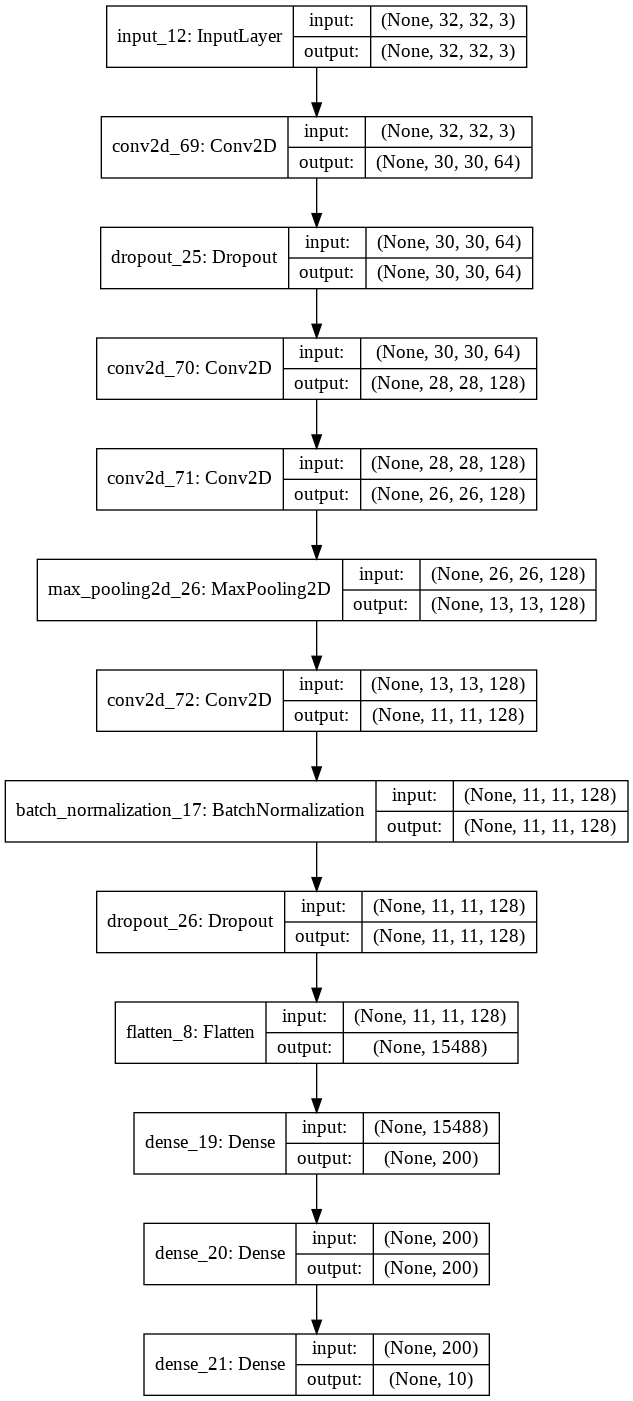

In [27]:
inputs = Input((32, 32, 3))
x = Conv2D(64, 3, activation='relu')(inputs)
x = Conv2D(64, 3, activation='relu')(inputs)
x = MaxPooling2D(2, 2)(x)
x = BatchNormalization()(x)
x = Conv2D(64, 3, activation='relu')(inputs)
x = Dropout(0.1)(x)

x = Conv2D(128, 3, activation='relu')(x)
x = Conv2D(128, 3, activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(128, 3, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)

x = Flatten()(x)

x =  Dense(200, activation='softmax')(x)
x =  Dense(200, activation='softmax')(x)
output = Dense(10, activation='softmax')(x)

keras.utils.plot_model(model,
                       show_shapes=True,
                       show_layer_names=True)


In [0]:
model = keras.Model(inputs, output)
model.compile(
    loss='categorical_crossentropy', #ここでクロスエントロピーを指定
    optimizer=keras.optimizers.Adam(), #学習アルゴリズムにAdamを指定
    metrics=["accuracy"], 
)
epochs = 50 #エポック数（全データを概ねチェックして更新する回数）を指定
history = model.fit_generator(datagen.flow(x_train_train, y_train_train, batch_size=50), epochs=epochs, verbose=1,
                              validation_data=datagen.flow(x_train_val, y_train_val, batch_size=50)
                              )

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


 12/800 [..............................] - ETA: 17:40 - loss: 2.3023 - accuracy: 0.1183

In [0]:
fig, ax = plt.subplots()
print(datagen.flow(x_train[0].reshape(1, 32, 32, 3), batch_size=1))
fig.savefig('/Users/fujimotogen/Desktop/outuput/fig1.png')

